# PPProjecct

## Data

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train_cache.csv')
train.head()

,iops,lat,block_size,n_jobs,iodepth,read_fraction,load_type,io_type,raid,n_disks,device_type,offset,id
0,712511,386627.74,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769
1,709311,388112.33,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769
2,712464,386384.72,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769
3,711226,387053.72,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769
4,710919,387191.78,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769


In [3]:
test = pd.read_csv('test_cache.csv')
test.head()

,iops,lat,block_size,n_jobs,iodepth,read_fraction,load_type,io_type,raid,n_disks,device_type,offset,id
0,21483,613944.00,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065
1,21354,610190.00,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065
2,20883,613910.75,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065
3,21493,610052.62,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065
4,21473,606866.62,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065


In [4]:
pd.unique(train[['block_size']]. values.ravel())

array([  8,  16,  32,  64, 256,   4, 128])

In [5]:
pd.unique(train[['n_jobs']]. values.ravel()).size

32

In [6]:
pd.unique(train[['iodepth']]. values.ravel()).size

16

In [7]:
pd.unique(train[['read_fraction']]. values.ravel()).size

101

In [8]:
pd.unique(train[['io_type']]. values.ravel())

array(['read', 'write'], dtype=object)

In [9]:
pd.unique(train[['id']]. values.ravel()).size

408

In [10]:
test['io_type_num'] = test['io_type'] == 'write'

In [11]:
test.io_type_num = test.io_type_num.replace({ True : 1 , False : 0 })

In [12]:
y_test = torch.tensor(test[['iops', 'lat']].values)

In [13]:
X_test = torch.tensor(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

In [14]:
train['io_type_num'] = train['io_type'] == 'write'

In [15]:
train.io_type_num = train.io_type_num.replace({ True : 1 , False : 0 })

In [16]:
y_tr = torch.tensor(train[['iops', 'lat']].values)

In [17]:
X_tr = torch.tensor(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

## Graphs

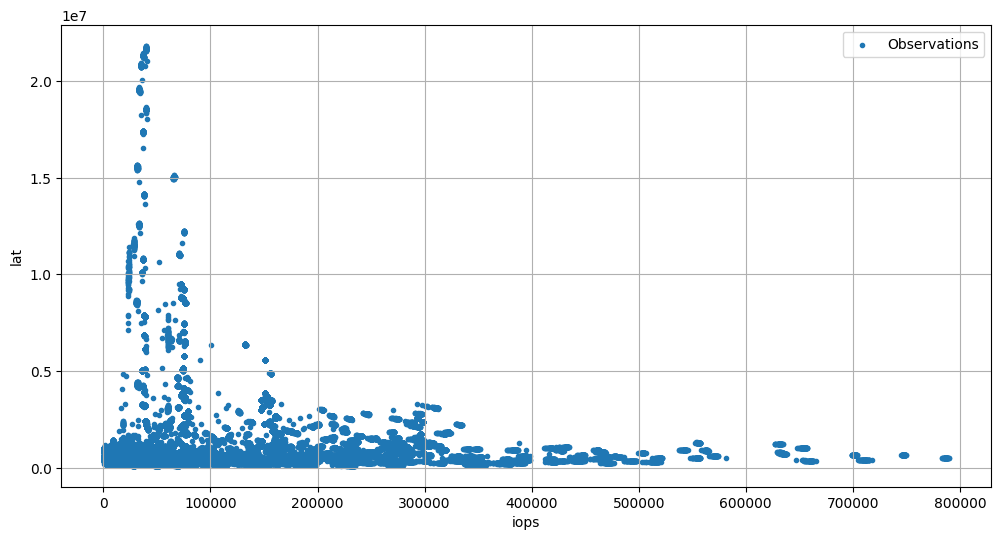

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(y_tr[:, 0], y_tr[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

## Model

In [2]:
!pip install probaforms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 74.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.13.1 which

In [1]:
from probaforms.models import RealNVP

# model
model = RealNVP(lr=0.01, n_epochs=50)

In [20]:
model.fit(y_tr, X_tr) # (target, condition)

/usr/local/lib/python3.10/dist-packages/probaforms/models/realnvp.py:220: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32, device=DEVICE)
/usr/local/lib/python3.10/dist-packages/probaforms/models/realnvp.py:222: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  C = torch.tensor(C, dtype=torch.float32, device=DEVICE)


In [21]:
# samples
y_gen = model.sample(X_test)

/usr/local/lib/python3.10/dist-packages/probaforms/models/realnvp.py:265: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  C = torch.tensor(C, dtype=torch.float32, device=DEVICE)


In [22]:
y_gen

array([[ 1.6143122e+05,  5.1300672e+05],
       [-2.1258393e+04,  8.2858756e+05],
       [-2.0838040e+03,  2.8312456e+05],
       ...,
       [ 2.4719147e+05,  5.0783505e+06],
       [-1.5984439e+04,  8.0880019e+05],
       [ 3.1043238e+05,  1.0127641e+07]], dtype=float32)

## Generated samples

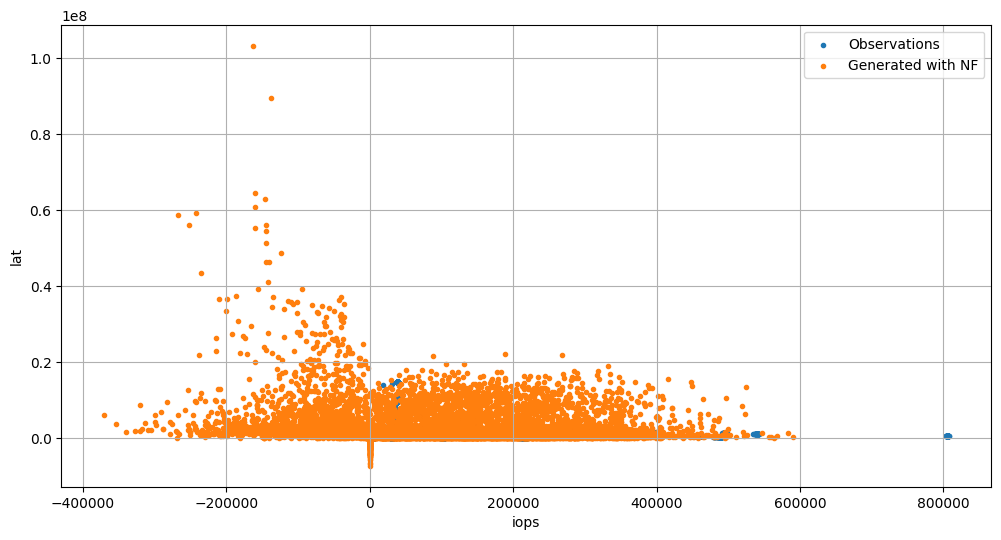

In [23]:
plt.figure(figsize=(12, 6))

plt.scatter(y_test[:, 0], y_test[:, 1], marker='.', label='Observations', linewidth=1)
plt.scatter(y_gen[:, 0], y_gen[:, 1], marker='.', label='Generated with NF', color='C1', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

## Some samples

### 1

In [ ]:
y_test_1 = torch.tensor(test[test['id'] == 'hse-09132022-180712-z63065'][['iops', 'lat']].values)

In [ ]:
X_test_1 = torch.tensor(test[test['id'] == 'hse-09132022-180712-z63065'][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

In [ ]:
y_gen_1 = model.sample(X_test_1.clone().detach())

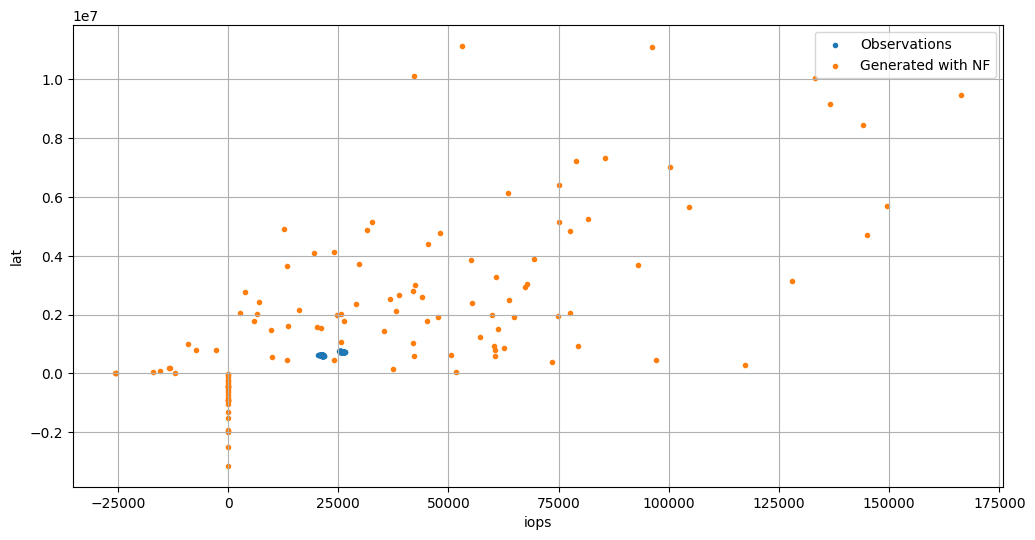

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(y_test_1[:, 0], y_test_1[:, 1], marker='.', label='Observations', linewidth=1)
plt.scatter(y_gen_1[:, 0], y_gen_1[:, 1], marker='.', label='Generated with NF', color='C1', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

### 2

In [ ]:
pd.unique(test[['id']]. values.ravel())

array(['hse-09132022-180712-z63065', 'hse-09132022-212616-z36709',
       'hse-09132022-203942-z36542', 'hse-09132022-113615-z47578',
       'hse-09132022-113127-z92275', 'hse-09132022-202959-z97080',
       'hse-09132022-130756-z72964', 'hse-09132022-152621-z23474',
       'hse-09132022-222402-z67880', 'hse-09142022-002727-z41754',
       'hse-09132022-215503-z42747', 'hse-09132022-154850-z69269',
       'hse-09132022-162550-z13863', 'hse-09132022-131738-z64548',
       'hse-09132022-163352-z28622', 'hse-09132022-203624-z40860',
       'hse-09132022-111214-z18642', 'hse-09132022-230720-z49925',
       'hse-09132022-180046-z99430', 'hse-09132022-162239-z71118',
       'hse-09132022-115719-z1844', 'hse-09132022-130309-z70101',
       'hse-09132022-143919-z2607', 'hse-09132022-191917-z69202',
       'hse-09132022-105038-z85297', 'hse-09132022-125820-z33361',
       'hse-09132022-200733-z61475', 'hse-09132022-174129-z68191',
       'hse-09132022-131108-z11709', 'hse-09132022-221738-z10431

In [ ]:
y_test_2 = torch.tensor(test[test['id'] == 'hse-09132022-212616-z36709'][['iops', 'lat']].values)
X_test_2 = torch.tensor(test[test['id'] == 'hse-09132022-212616-z36709'][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

In [ ]:
y_gen_2 = model.sample(X_test_2.clone().detach())

C:\Users\neyju\probaforms\probaforms\models\realnvp.py:265: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  C = torch.tensor(C, dtype=torch.float32, device=DEVICE)


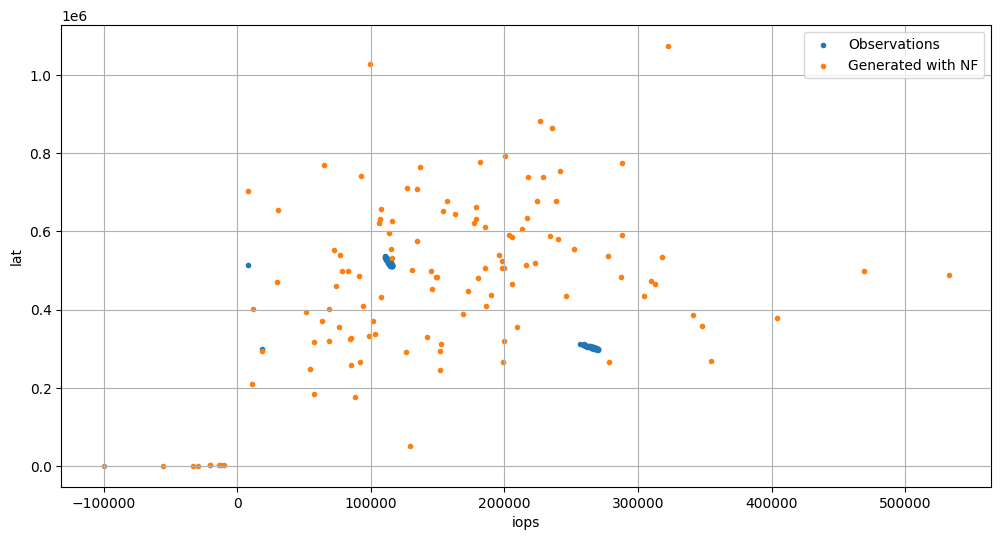

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(y_test_2[:, 0], y_test_2[:, 1], marker='.', label='Observations', linewidth=1)
plt.scatter(y_gen_2[:, 0], y_gen_2[:, 1], marker='.', label='Generated with NF', color='C1', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

## BEtter model

In [19]:
from probaforms.models import RealNVP

# model
model = RealNVP(lr=0.01, n_epochs=80)

In [20]:
model.fit(y_tr, X_tr) # (target, condition)

/usr/local/lib/python3.10/dist-packages/probaforms/models/realnvp.py:220: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32, device=DEVICE)
/usr/local/lib/python3.10/dist-packages/probaforms/models/realnvp.py:222: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  C = torch.tensor(C, dtype=torch.float32, device=DEVICE)


In [21]:
# samples
y_gen = model.sample(X_test)

/usr/local/lib/python3.10/dist-packages/probaforms/models/realnvp.py:265: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  C = torch.tensor(C, dtype=torch.float32, device=DEVICE)


In [22]:
y_gen

array([[   5607.263,  236027.97 ],
       [  25093.084,  978303.25 ],
       [  29586.416, 1067582.4  ],
       ...,
       [  67122.51 , 4310920.   ],
       [  30601.56 ,  428137.25 ],
       [  60109.125, 2987865.5  ]], dtype=float32)

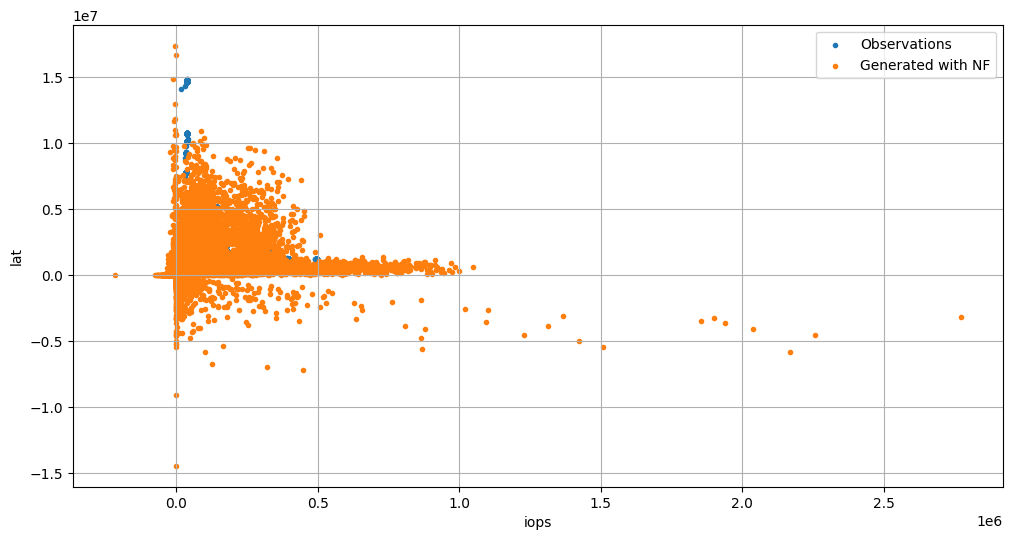

In [23]:
plt.figure(figsize=(12, 6))

plt.scatter(y_test[:, 0], y_test[:, 1], marker='.', label='Observations', linewidth=1)
plt.scatter(y_gen[:, 0], y_gen[:, 1], marker='.', label='Generated with NF', color='C1', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

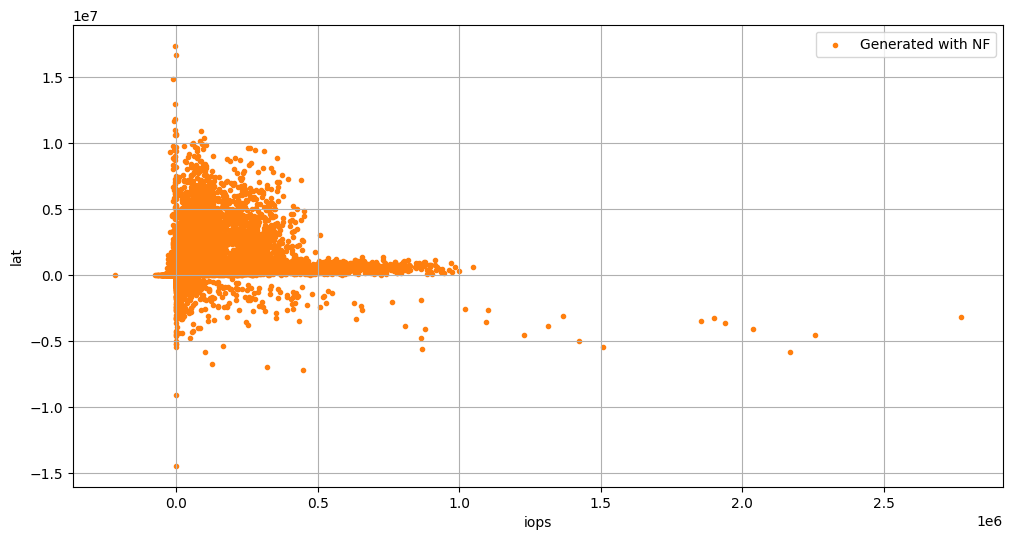

In [24]:
plt.figure(figsize=(12, 6))

# plt.scatter(y_test[:, 0], y_test[:, 1], marker='.', label='Observations', linewidth=1)
plt.scatter(y_gen[:, 0], y_gen[:, 1], marker='.', label='Generated with NF', color='C1', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

## Another model

In [19]:
from probaforms.models import RealNVP

# model
model = RealNVP(lr=0.01, n_epochs=100)

In [20]:
model.fit(y_tr, X_tr) # (target, condition)

/usr/local/lib/python3.10/dist-packages/probaforms/models/realnvp.py:220: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32, device=DEVICE)
/usr/local/lib/python3.10/dist-packages/probaforms/models/realnvp.py:222: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  C = torch.tensor(C, dtype=torch.float32, device=DEVICE)


In [21]:
# samples
y_gen = model.sample(X_test)

/usr/local/lib/python3.10/dist-packages/probaforms/models/realnvp.py:265: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  C = torch.tensor(C, dtype=torch.float32, device=DEVICE)


In [22]:
y_gen

array([[ 6.2843613e+04,  2.3938500e+06],
       [ 3.1598152e+04,  1.9098060e+06],
       [ 1.4530721e+01, -2.6286717e+04],
       ...,
       [ 8.6389070e+04,  1.4848755e+07],
       [ 7.2005922e+04,  5.4041125e+06],
       [ 6.8755859e+04,  9.1522950e+06]], dtype=float32)

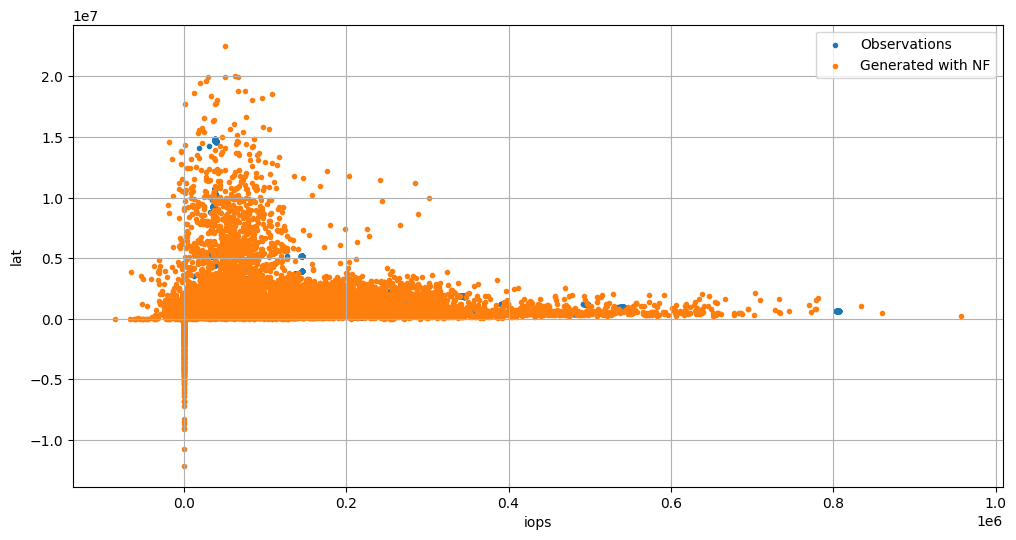

In [23]:
plt.figure(figsize=(12, 6))

plt.scatter(y_test[:, 0], y_test[:, 1], marker='.', label='Observations', linewidth=1)
plt.scatter(y_gen[:, 0], y_gen[:, 1], marker='.', label='Generated with NF', color='C1', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

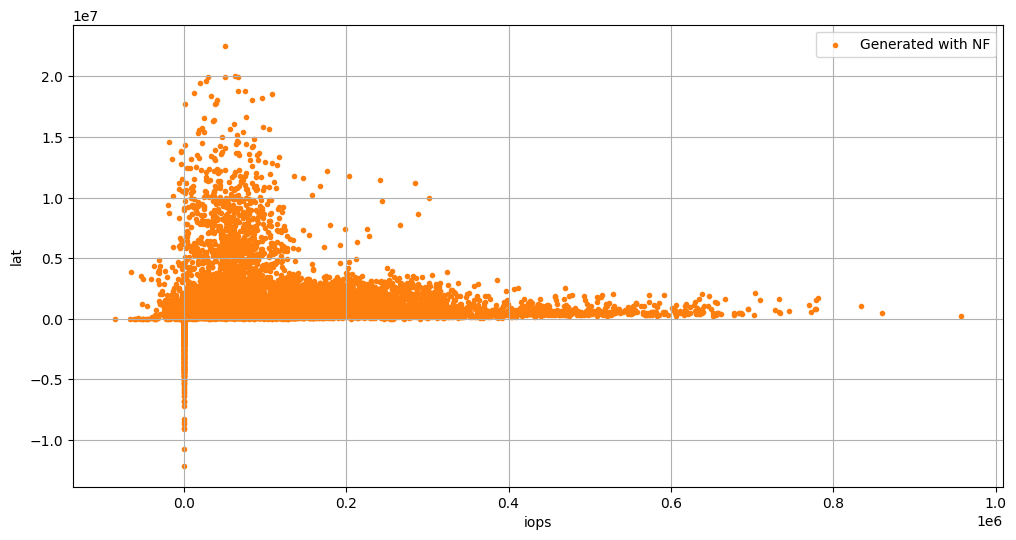

In [24]:
plt.figure(figsize=(12, 6))

# plt.scatter(y_test[:, 0], y_test[:, 1], marker='.', label='Observations', linewidth=1)
plt.scatter(y_gen[:, 0], y_gen[:, 1], marker='.', label='Generated with NF', color='C1', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

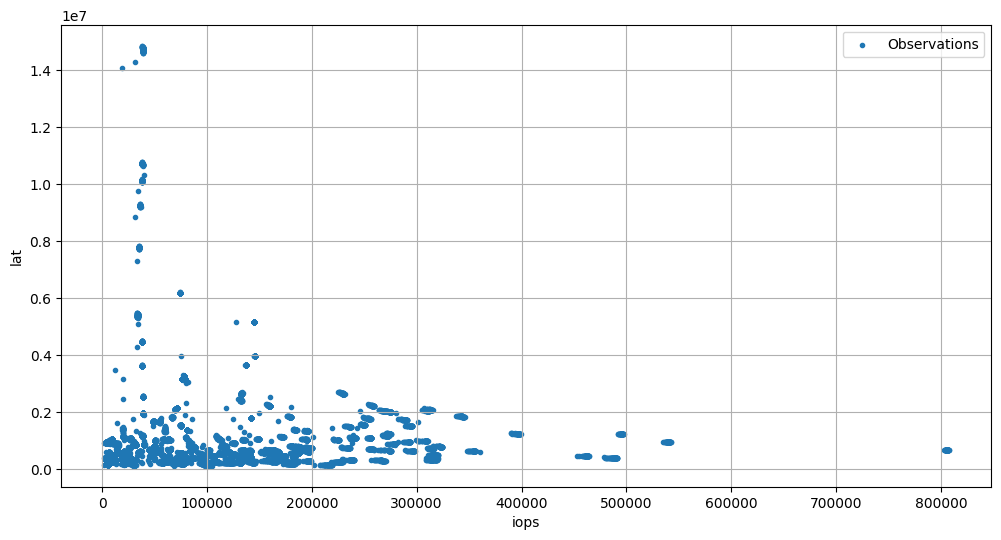

In [25]:
plt.figure(figsize=(12, 6))

plt.scatter(y_test[:, 0], y_test[:, 1], marker='.', label='Observations', linewidth=1)
# plt.scatter(y_gen[:, 0], y_gen[:, 1], marker='.', label='Generated with NF', color='C1', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

## Some samples

### 1

In [26]:
y_test_1 = torch.tensor(test[test['id'] == 'hse-09132022-180712-z63065'][['iops', 'lat']].values)

In [27]:
X_test_1 = torch.tensor(test[test['id'] == 'hse-09132022-180712-z63065'][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

In [28]:
y_gen_1 = model.sample(X_test_1.clone().detach())

/usr/local/lib/python3.10/dist-packages/probaforms/models/realnvp.py:265: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  C = torch.tensor(C, dtype=torch.float32, device=DEVICE)


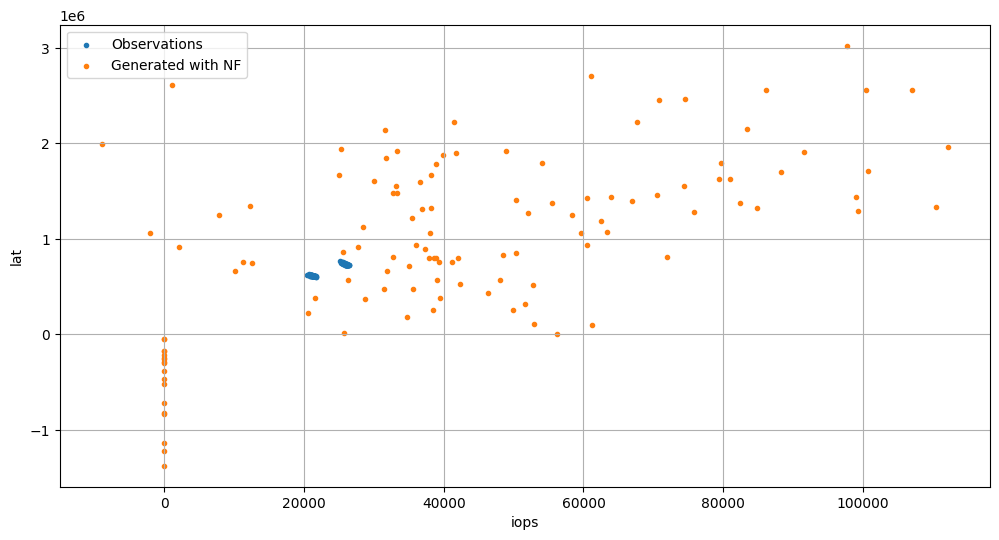

In [29]:
plt.figure(figsize=(12, 6))

plt.scatter(y_test_1[:, 0], y_test_1[:, 1], marker='.', label='Observations', linewidth=1)
plt.scatter(y_gen_1[:, 0], y_gen_1[:, 1], marker='.', label='Generated with NF', color='C1', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

### 2

In [30]:
pd.unique(test[['id']]. values.ravel())

array(['hse-09132022-180712-z63065', 'hse-09132022-212616-z36709',
       'hse-09132022-203942-z36542', 'hse-09132022-113615-z47578',
       'hse-09132022-113127-z92275', 'hse-09132022-202959-z97080',
       'hse-09132022-130756-z72964', 'hse-09132022-152621-z23474',
       'hse-09132022-222402-z67880', 'hse-09142022-002727-z41754',
       'hse-09132022-215503-z42747', 'hse-09132022-154850-z69269',
       'hse-09132022-162550-z13863', 'hse-09132022-131738-z64548',
       'hse-09132022-163352-z28622', 'hse-09132022-203624-z40860',
       'hse-09132022-111214-z18642', 'hse-09132022-230720-z49925',
       'hse-09132022-180046-z99430', 'hse-09132022-162239-z71118',
       'hse-09132022-115719-z1844', 'hse-09132022-130309-z70101',
       'hse-09132022-143919-z2607', 'hse-09132022-191917-z69202',
       'hse-09132022-105038-z85297', 'hse-09132022-125820-z33361',
       'hse-09132022-200733-z61475', 'hse-09132022-174129-z68191',
       'hse-09132022-131108-z11709', 'hse-09132022-221738-z10431

In [31]:
y_test_2 = torch.tensor(test[test['id'] == 'hse-09132022-212616-z36709'][['iops', 'lat']].values)
X_test_2 = torch.tensor(test[test['id'] == 'hse-09132022-212616-z36709'][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

In [32]:
y_gen_2 = model.sample(X_test_2.clone().detach())

/usr/local/lib/python3.10/dist-packages/probaforms/models/realnvp.py:265: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  C = torch.tensor(C, dtype=torch.float32, device=DEVICE)


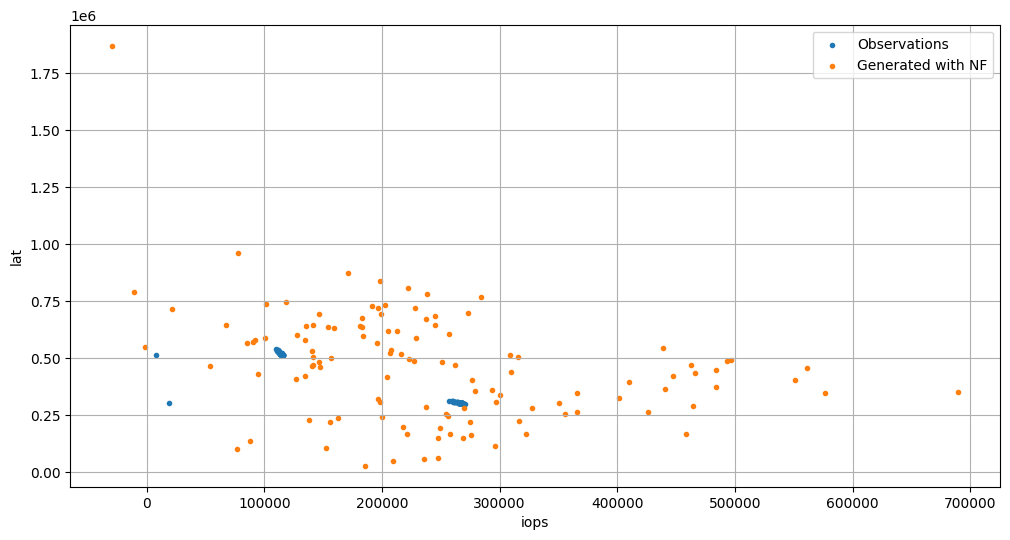

In [33]:
plt.figure(figsize=(12, 6))

plt.scatter(y_test_2[:, 0], y_test_2[:, 1], marker='.', label='Observations', linewidth=1)
plt.scatter(y_gen_2[:, 0], y_gen_2[:, 1], marker='.', label='Generated with NF', color='C1', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()